<a href="https://colab.research.google.com/github/srujayreddyv/CSC177-P3-ClassificationModelsProject/blob/main/CSC177_P3_ClassificationLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC177- Project 3 Part A
# Classification Models Project (Fall 2023)

## Team Challengers (23):
  1. Srujay Reddy Vangoor
  2. Vaibhav Jain
  3. Bashar Allwza
  4. Varun Bailapudi
  5. Uddayankith Chodagam

## Loading the dataset

In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [3]:
df = pd.read_csv("Churn_Modelling.csv")

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Preprocessing the dataset

In [7]:
# Descriptive statistics of the data set accessed.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [8]:
df.groupby("Gender").agg({"Age": "mean"})

,Age
Gender,
Female,39.238389
Male,38.658237


In [9]:
df.groupby("Gender").agg({"Exited": "mean"})

,Exited
Gender,
Female,0.250715
Male,0.164559


In [10]:
df.groupby("Geography").agg({"Exited": "mean"})

,Exited
Geography,
France,0.161548
Germany,0.324432
Spain,0.166734


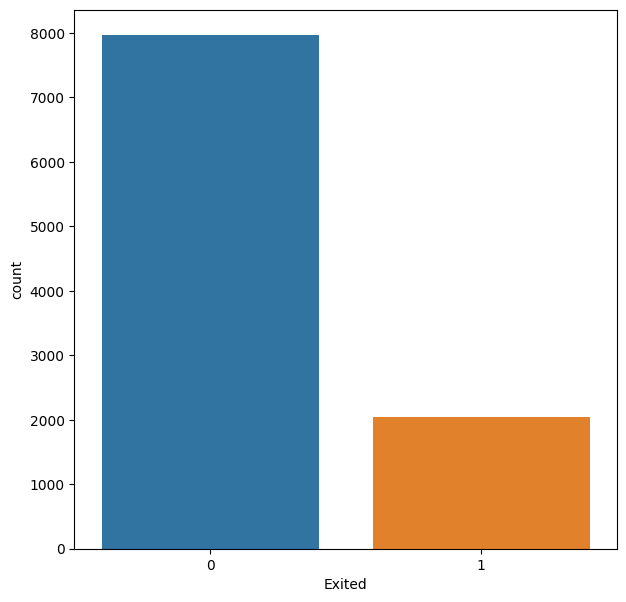

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(7,7))
sns.countplot(x='Exited', data=df)
plt.show()

In [12]:
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [13]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [14]:
df.groupby(["Gender", "Exited"]).agg({"Tenure" : "mean"})

Tenure
Gender Exited          
Female 0       4.977086
       1       4.933275
Male   0       5.075236
       1       4.932071

In [15]:
df["NewAge"] = pd.qcut(df['Age'], 5)
df.groupby("NewAge")["Exited"].value_counts()

NewAge          Exited
(17.999, 31.0]  0         2191
                1          181
(31.0, 35.0]    0         1615
                1          166
(35.0, 40.0]    0         1927
                1          339
(40.0, 46.0]    0         1211
                1          485
(46.0, 92.0]    0         1019
                1          866
Name: Exited, dtype: int64

In [16]:
df.corr(numeric_only=True)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: xlabel='IsActiveMember', ylabel='count'>

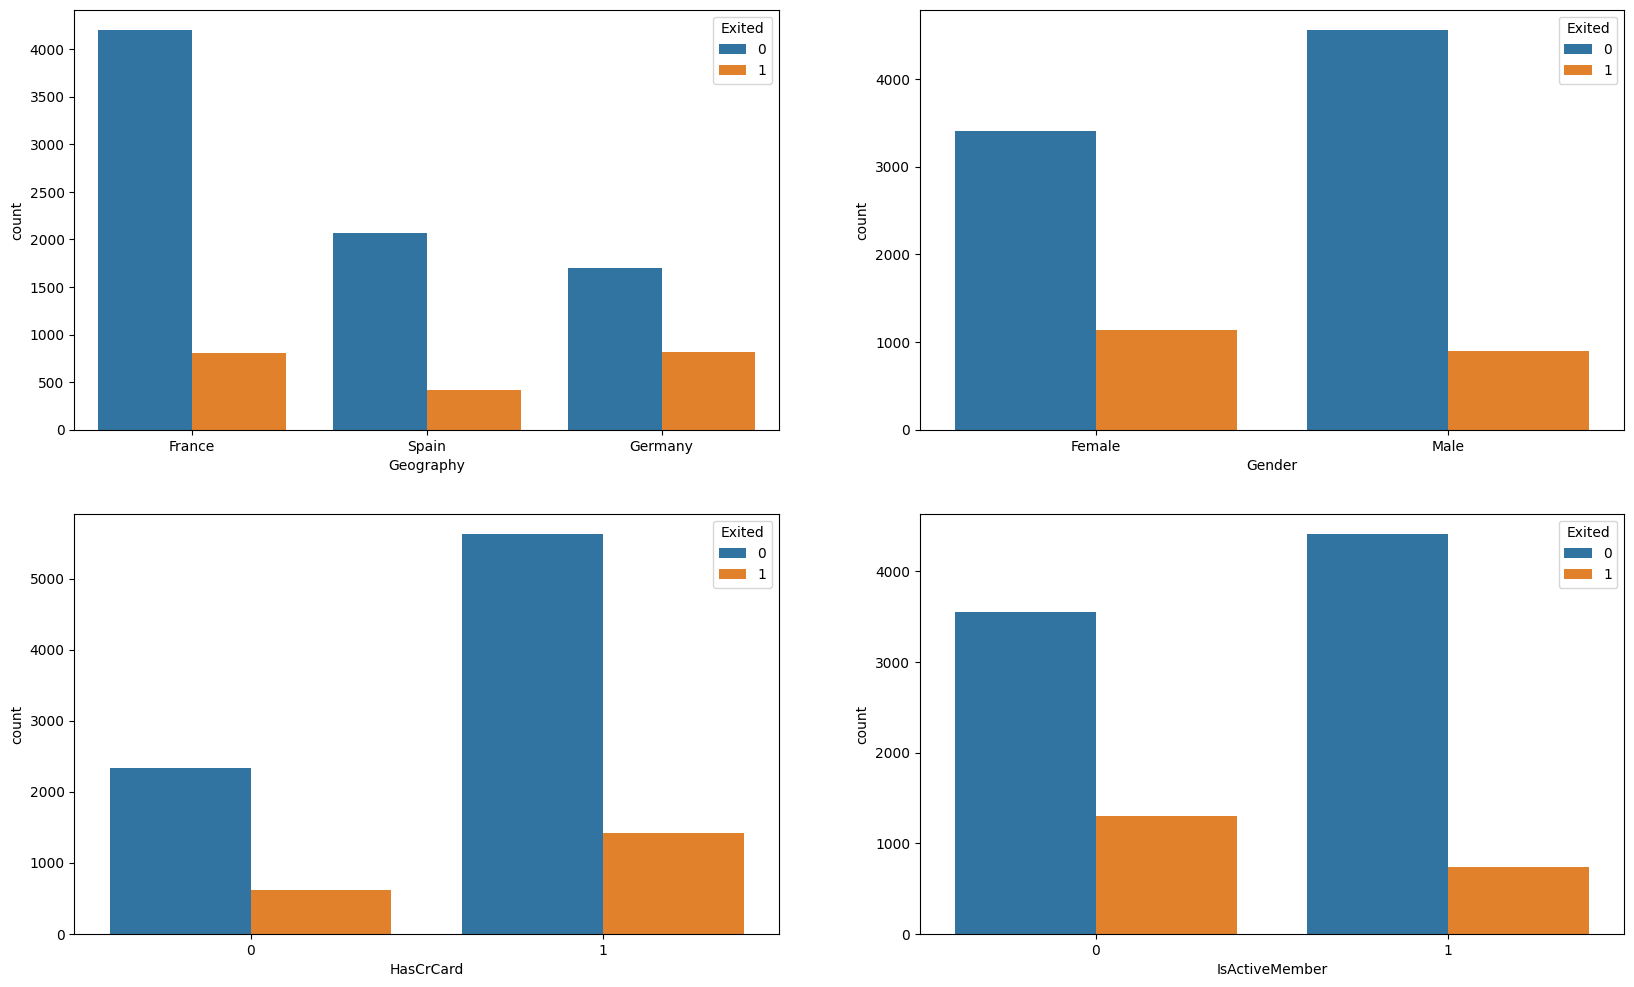

In [17]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

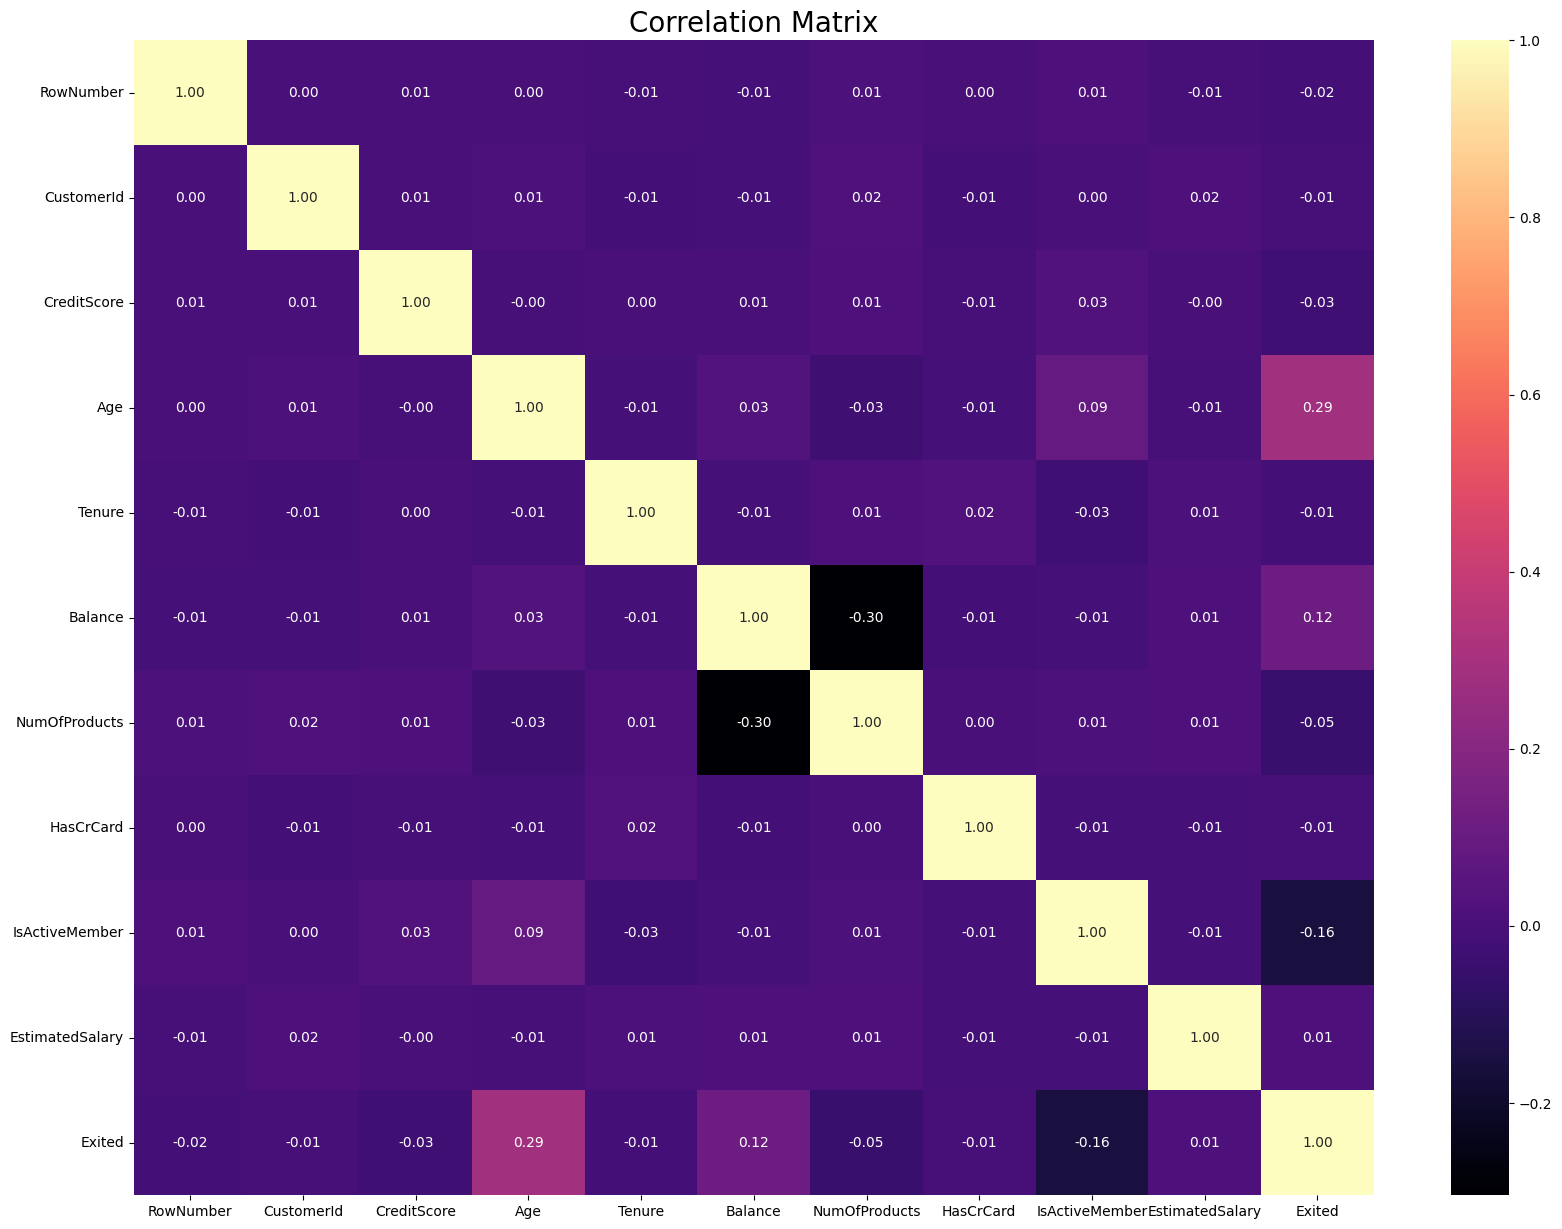

In [18]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

## Feature selection and train test split


In [19]:
df["NewAGT"] = df["Age"] - df["Tenure"]
df["CreditsScore"] = pd.qcut(df['CreditScore'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
df["AgeScore"] = pd.qcut(df['Age'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])
df["BalanceScore"] = pd.qcut(df['Balance'].rank(method="first"), 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
df["EstSalaryScore"] = pd.qcut(df['EstimatedSalary'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
df["NewEstimatedSalary"] = df["EstimatedSalary"] / 12

In [20]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,IsActiveMember,EstimatedSalary,Exited,NewAge,NewAGT,CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,...,1,101348.88,1,"(40.0, 46.0]",40,4,6,1,6,8445.740000
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,...,1,112542.58,0,"(40.0, 46.0]",40,4,6,5,6,9378.548333
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,...,0,113931.57,1,"(40.0, 46.0]",34,1,6,10,6,9494.297500
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,...,0,93826.63,0,"(35.0, 40.0]",38,7,5,1,5,7818.885833
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,...,1,79084.10,0,"(40.0, 46.0]",41,10,6,8,4,6590.341667


In [21]:
df = pd.get_dummies(df, columns =["Geography", "Gender"], drop_first = True)

In [22]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,NewAge,NewAGT,CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,...,"(40.0, 46.0]",40,4,6,1,6,8445.740000,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,...,"(40.0, 46.0]",40,4,6,5,6,9378.548333,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,...,"(40.0, 46.0]",34,1,6,10,6,9494.297500,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,...,"(35.0, 40.0]",38,7,5,1,5,7818.885833,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,...,"(40.0, 46.0]",41,10,6,8,4,6590.341667,0,1,0


In [23]:
df = df.drop(["CustomerId","Surname","NewAge"], axis = 1)

In [24]:
df.set_index('RowNumber',inplace=True)

In [25]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewAGT,CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,40,4,6,1,6,8445.740000,0,0,0
2,608,41,1,83807.86,1,0,1,112542.58,0,40,4,6,5,6,9378.548333,0,1,0
3,502,42,8,159660.80,3,1,0,113931.57,1,34,1,6,10,6,9494.297500,0,0,0
4,699,39,1,0.00,2,0,0,93826.63,0,38,7,5,1,5,7818.885833,0,0,0
5,850,43,2,125510.82,1,1,1,79084.10,0,41,10,6,8,4,6590.341667,0,1,0


In [26]:
cat_df = df[["Geography_Germany", "Geography_Spain", "Gender_Male", "HasCrCard","IsActiveMember"]]

In [27]:
cat_df.head()

,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard,IsActiveMember
RowNumber,,,,,
1,0,0,0,1,1
2,0,1,0,0,1
3,0,0,0,1,0
4,0,0,0,0,0
5,0,1,0,1,1


In [28]:
y = df["Exited"]
X = df.drop(["Exited","Geography_Germany", "Geography_Spain", "Gender_Male", "HasCrCard","IsActiveMember"], axis = 1)
cols = X.columns
index = X.index

In [29]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,NewAGT,CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary
RowNumber,,,,,,,,,,,,
1,619,42,2,0.00,1,101348.88,40,4,6,1,6,8445.740000
2,608,41,1,83807.86,1,112542.58,40,4,6,5,6,9378.548333
3,502,42,8,159660.80,3,113931.57,34,1,6,10,6,9494.297500
4,699,39,1,0.00,2,93826.63,38,7,5,1,5,7818.885833
5,850,43,2,125510.82,1,79084.10,41,10,6,8,4,6590.341667


In [30]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [31]:
X = pd.concat([X,cat_df], axis = 1)

In [32]:
print(X.shape, y.shape)

(10000, 17) (10000,)


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=12345)

In [34]:
# from imblearn.combine import SMOTETomek

# smk = SMOTETomek()
# # Oversample training  data
# X_train, y_train = smk.fit_sample(X_train, y_train)

# # Oversample validation data
# X_test, y_test = smk.fit_sample(X_test, y_test)

from imblearn.over_sampling import SMOTE

smk = SMOTE()
X_train, y_train = smk.fit_resample(X_train, y_train)

# Oversample validation data
X_test, y_test = smk.fit_resample(X_test, y_test)

In [35]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12780, 17) (3146, 17) (12780,) (3146,)


## Running Models

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

In [37]:
len(X_train.loc[0])

17

In [38]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,NewAGT,CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard,IsActiveMember
0,0.791045,0.166667,0.250000,0.236276,0.000000,-0.443324,0.083333,0.800000,0.250000,0.500000,-0.500000,-0.443324,0,0,0,0,1
1,-0.253731,-0.583333,-0.500000,0.287092,0.000000,-0.699153,-0.416667,-0.200000,-0.500000,0.700000,-0.700000,-0.699153,0,0,1,1,1
2,-0.574627,-0.916667,0.500000,-0.761480,1.000000,0.125157,-1.083333,-0.400000,-0.750000,-0.700000,0.100000,0.125157,0,1,0,1,0
3,-0.179104,0.000000,-1.250000,-0.761480,1.000000,0.726871,0.416667,0.000000,0.000000,-0.900000,0.700000,0.726871,0,0,1,1,1
4,0.731343,-0.166667,-0.500000,-0.761480,0.000000,0.928246,0.000000,0.800000,-0.250000,-0.300000,0.900000,0.928246,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12775,0.400560,0.029837,0.806585,0.712195,0.000000,-0.324028,-0.239025,0.490536,0.113170,0.900000,-0.364196,-0.324028,0,0,1,0,0
12776,0.015549,-0.269963,0.230037,-0.311114,0.039926,-0.877018,-0.346642,0.184030,-0.269963,-0.307985,-0.900000,-0.877018,0,1,0,1,0
12777,-0.016162,-0.162931,0.522416,-0.164944,2.000000,0.299358,-0.337069,-0.008967,-0.238792,-0.091033,0.300000,0.299358,0,0,1,1,0
12778,-0.808402,1.381217,-0.428174,0.094074,2.000000,-0.719639,1.523942,-0.600000,0.940609,0.252487,-0.757461,-0.719639,1,0,0,1,0


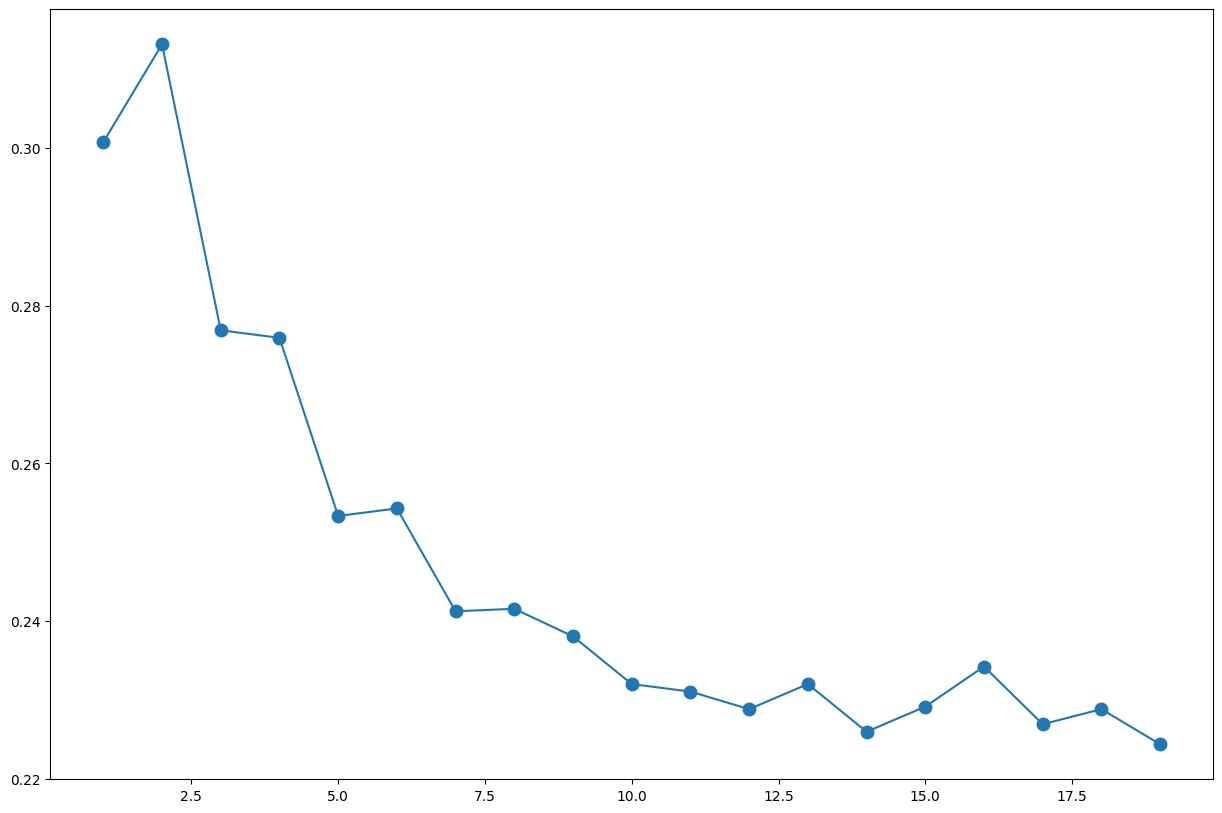

In [39]:
import numpy as np
error_rate = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
#     accuracy = accuracy_score(y_test, pred)
#     msg = "%s: (%f)" % (name, accuracy)
#     print(msg)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,20),error_rate, marker='o', markersize=9)

In [40]:
k = 17

In [41]:
print("best K value comes with neighbors =",k)

best K value comes with neighbors = 17


In [42]:
models = []
models.append(('Logit', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=k)))
models.append(('DT', DecisionTreeClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('Naive_Bayes', GaussianNB()))
# evaluate each model in turn
results = []
names = []

In [43]:
for name, model in models:
        model.fit(X_train, y_train)

## Accuracies on Test data

In [44]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

LogisticRegression(random_state=12345)
[[1114  459]
 [ 360 1213]]
Accuracy on test data is 0.74
F1 score on test data is 0.73
Precision Score on test data is 0.76
Recall score on test data is 0.71
              precision    recall  f1-score   support

           0       0.76      0.71      0.73      1573
           1       0.73      0.77      0.75      1573

    accuracy                           0.74      3146
   macro avg       0.74      0.74      0.74      3146
weighted avg       0.74      0.74      0.74      3146





KNeighborsClassifier(n_neighbors=17)
[[1193  380]
 [ 334 1239]]
Accuracy on test data is 0.77
F1 score on test data is 0.77
Precision Score on test data is 0.78
Recall score on test data is 0.76
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1573
           1       0.77      0.79      0.78      1573

    accuracy                           0.77      3146
   macro avg       0.77      0.77      0.77      3146
weigh

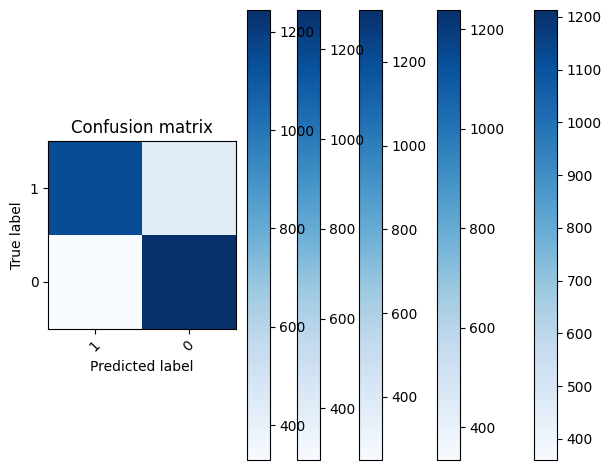

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score,recall_score,classification_report
score_data = []
for name, model in models:
        print(model)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, accuracy)
        score_data.append([name,round(accuracy,4)])
        confusion = confusion_matrix(y_test, y_pred)
        print(confusion)
        plot_confusion_matrix(confusion,df.Exited.unique(), title='Confusion matrix', cmap=plt.cm.Blues)
        print('Accuracy on test data is %.2f' % (accuracy_score(y_test, y_pred)))
        print('F1 score on test data is %.2f' % (f1_score(y_test, y_pred,pos_label=0)))
        print('Precision Score on test data is %.2f' % (precision_score(y_test, y_pred,pos_label=0)))
        print('Recall score on test data is %.2f' % (recall_score(y_test, y_pred,pos_label=0)))
        print( classification_report(y_test, y_pred))
        print("\n\n\n")

In [46]:
from tabulate import tabulate
headers = ["Models", "Accuracy"]
print(tabulate(score_data, headers, tablefmt="pretty"))
print("BEST K VALUE is: ",k)

+-------------+----------+
|   Models    | Accuracy |
+-------------+----------+
|    Logit    |  0.7397  |
|     KNN     |  0.773   |
|     DT      |  0.7937  |
|     SVM     |  0.7969  |
| Naive_Bayes |  0.7587  |
+-------------+----------+
BEST K VALUE is:  17


In [47]:
models2 = []
models2.append(('DT', DecisionTreeClassifier( random_state = 12345)))

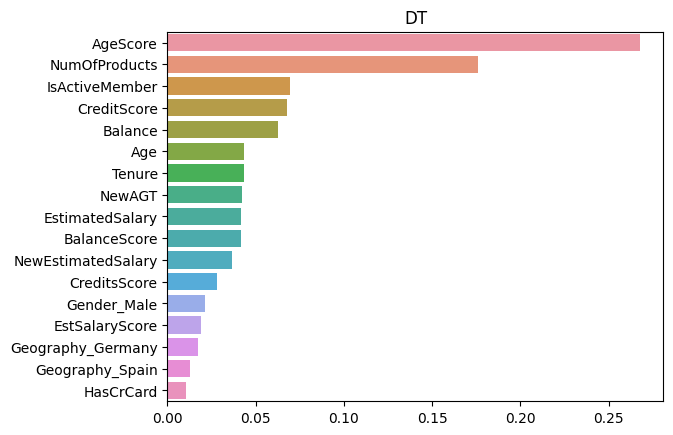

In [48]:
for name, model in models2:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.title(name)
        plt.show()